In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt   
import matplotlib.style
from warnings import filterwarnings
filterwarnings('ignore')

#Ans 1

##Ans 1.1

In [ ]:
Path=('/content/drive/MyDrive/cubic_zirconia.csv')
Gem= pd.read_csv(Path)

In [ ]:
Gem.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [ ]:
Gem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
Gem.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [ ]:
# Removing the Unnamed column as it is not necessary for our analysis
Gem.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
Gem.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [ ]:
Gem.shape

(26967, 10)

In [ ]:
dups = Gem.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Gem[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [ ]:
Gem.drop_duplicates(inplace=True)

In [ ]:
Gem.shape

(26933, 10)

In [ ]:
Gem['cut'].value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [ ]:
Gem['color'].value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [ ]:
Gem['clarity'].value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

In [ ]:
Gem.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

###depth column has 697 missing values. I will impute them with Median value of 61.8 so that we do not miss out on the information we have in this dataset.

###From the description table I can see the minimum value of x, y and z is 0 which is not possible.

In [ ]:
Gem[(Gem.x==0)|(Gem.y==0)|(Gem.z==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


###There are 8 rows for which length/width/height is 0. Since these values cannot be 0 , these are missing values too. Count of these rows are very very less. We can either drop them or impute with the median values

In [ ]:
Gem.x.replace(0,np.nan,inplace=True )
Gem.y.replace(0,np.nan,inplace=True )
Gem.z.replace(0,np.nan,inplace=True )

In [ ]:
Gem.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26931.000000,26931.000000,26925.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729772,5.733528,3.538820,3937.526120
std,0.477237,1.412243,2.232156,1.126327,1.164032,0.717483,4022.551862
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.715000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


###Univariate Analysis

###Numerical Variables

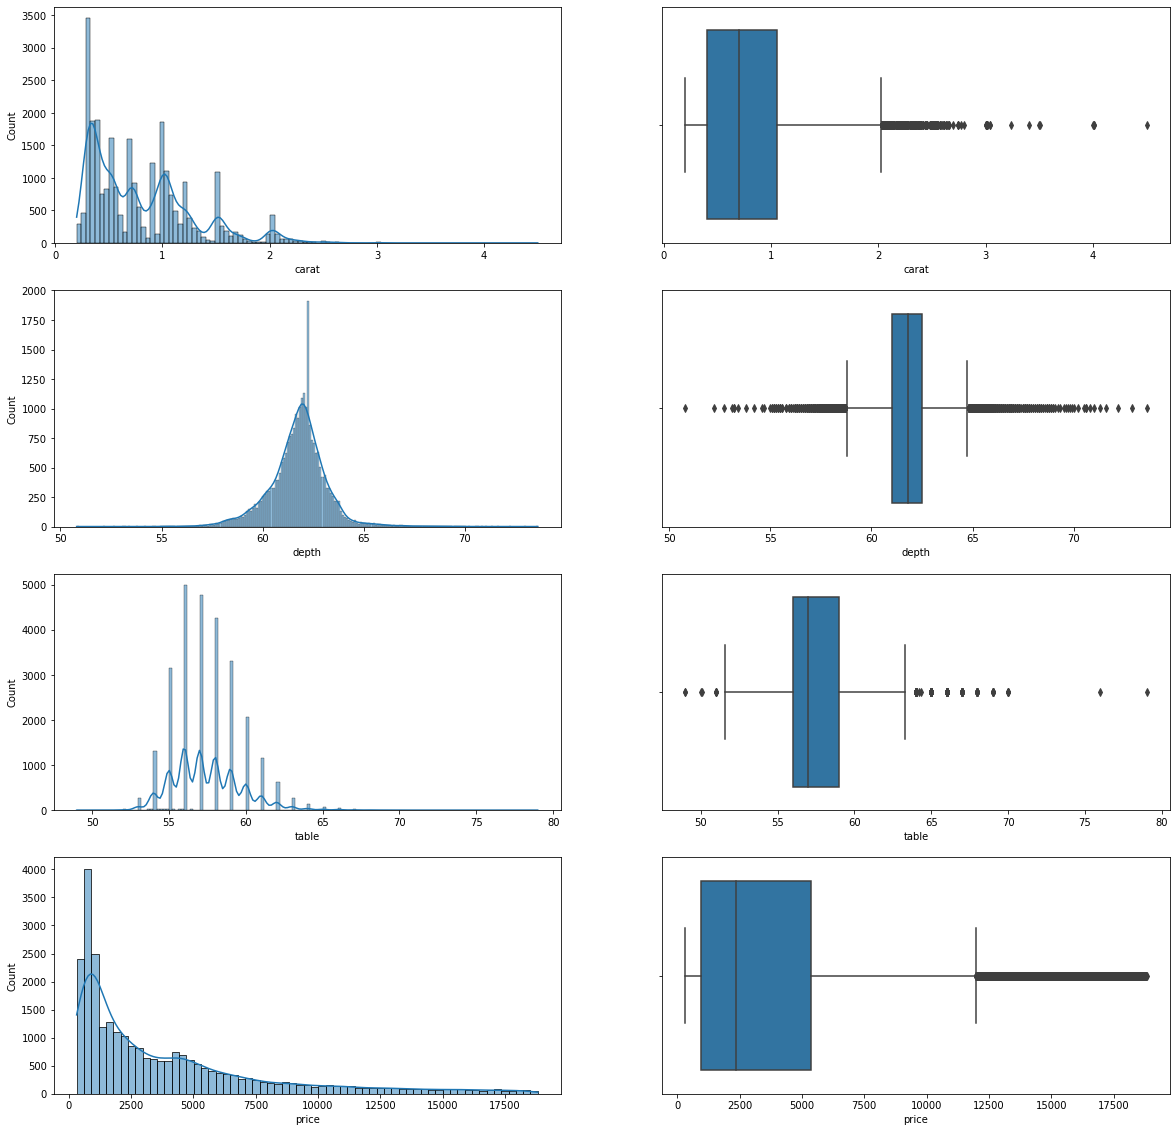

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,20)
sns.histplot(Gem['carat'], kde=True, ax=axes[0][0])
sns.boxplot(x='carat', data=Gem, ax=axes[0][1])
sns.histplot(Gem['depth'] , kde=True, ax=axes[1][0])
sns.boxplot(x='depth', data=Gem , ax=axes[1][1])
sns.histplot(Gem['table'] , kde=True, ax=axes[2][0])
sns.boxplot(x='table', data=Gem , ax=axes[2][1])
sns.histplot(Gem['price'], kde=True, ax=axes[3][0])
sns.boxplot(x='price', data=Gem, ax=axes[3][1])
plt.show()

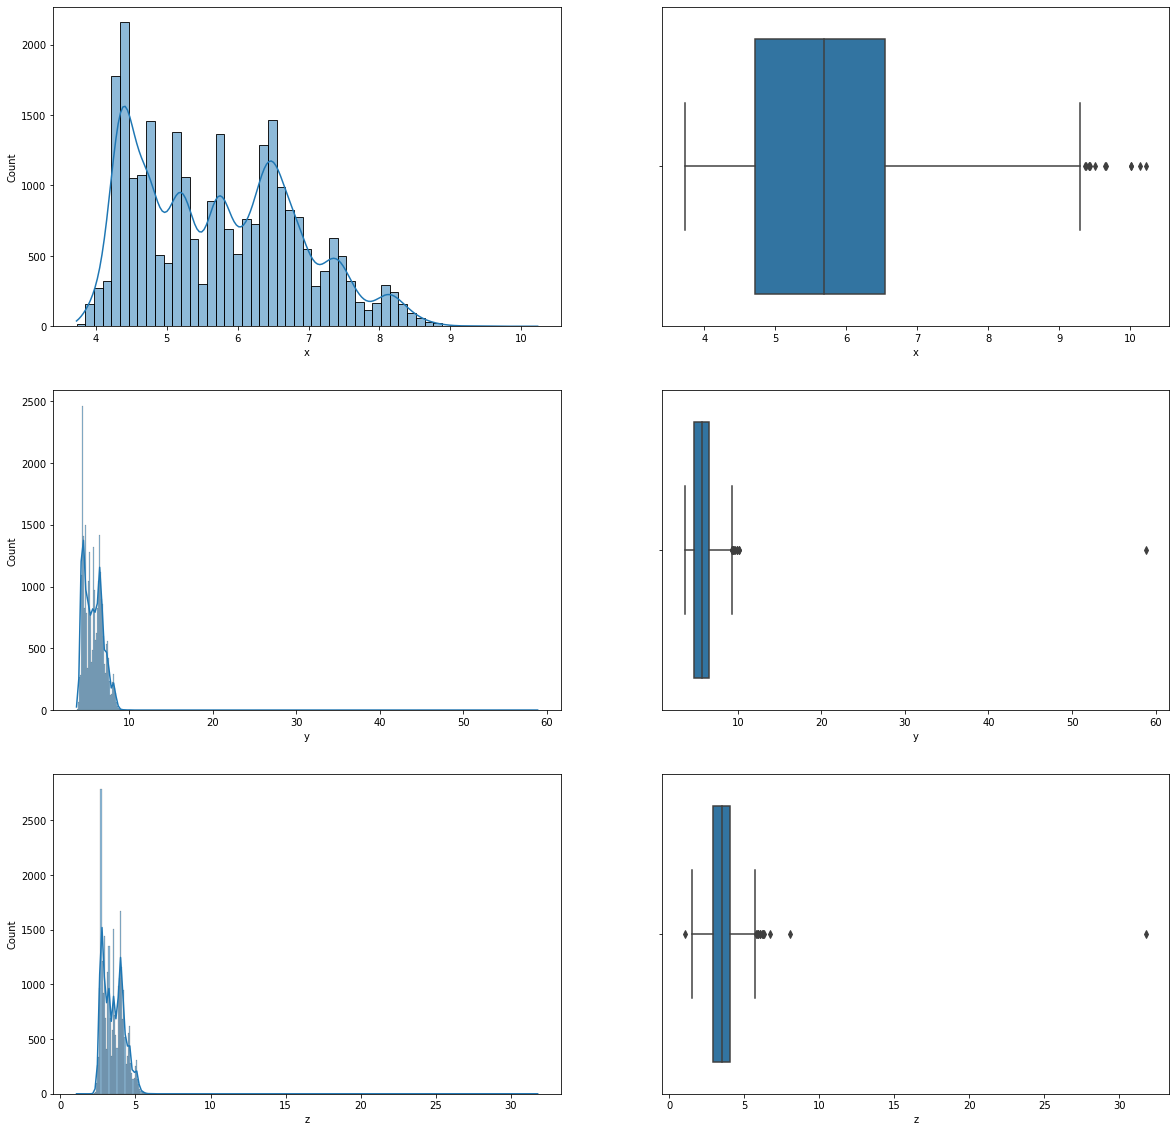

In [ ]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,20)
sns.histplot(Gem['x'], kde=True, ax=axes[0][0])
sns.boxplot(x='x', data=Gem, ax=axes[0][1])
sns.histplot(Gem['y'] , kde=True, ax=axes[1][0])
sns.boxplot(x='y', data=Gem , ax=axes[1][1])
sns.histplot(Gem['z'] , kde=True, ax=axes[2][0])
sns.boxplot(x='z', data=Gem , ax=axes[2][1])
plt.show()

###From the above visualization and analysis the data I can see that for

*   depth - Data is normally distributed and the mean and median are almost same. The mean for depth is 61.75 and the median is 61.8. The minimum height of cubic zirconia is 50.8 and the maximum height of cubic zirconia is 73.60. Many outliers are detected.
*   carat - Data is positively screwed and the mean is greater than the median. The mean for carat is 0.79 and the median is 0.70. The minimum carat weight of the cubic zirconia is 0.2 and the maximum carat weight of the cubic zirconia is 4.5. Outliers are detected.
*   table	- Here mean is almost equal to the median so I can say it is normally distributed. The mean is 57.45 and the median is 57. The minimum width of the cubic zirconia's table is 49 and the maximum width of the cubic zirconia's table  is 79. Outliers are present.
*   price - The mean is much greater than the median, the data is positively skewed. The mean for price is 3937.52 and the median is 2375. The minimum price of the cubic zirconia is 326 and the maximum price of the cubic zirconia 18818. Outliers are detected.
*   x- Data is normally distributed and the mean and median are almost same. The mean for x is 5.73 and the median is 5.69. The minimum length of the cubic zirconia in mm is 3.73 and the maximum length of the cubic zirconia in mm is 10.23. Outliers are detected.
*   y- Data is normally distributed and the mean is almost equal to the median. The mean is 5.73 and the median is 5.70. The minimum width of the cubic zirconia in mm is 3.71 and the maximum width of the cubic zirconia in mm is 58.9 . The Outliers are detected.
*   z- Data is normally distributed and the mean is almost equal to the median. The mean is 3.53 and the median is 3.52. The minimum height of the cubic zirconia in mm is 1.07 and the maximum height of the cubic zirconia in mm is 31.8 . The Outliers are detected.

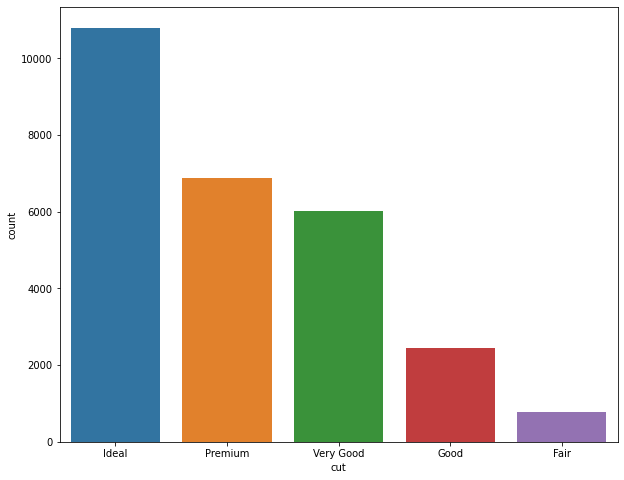

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(Gem['cut']);

###From the visualization of categorical variable 'cut' I can see that cut quality of the cubic zirconia is in 5 types and among them the concentration of Ideal quality is the highest and the concentration of Fair quality is the lowest.

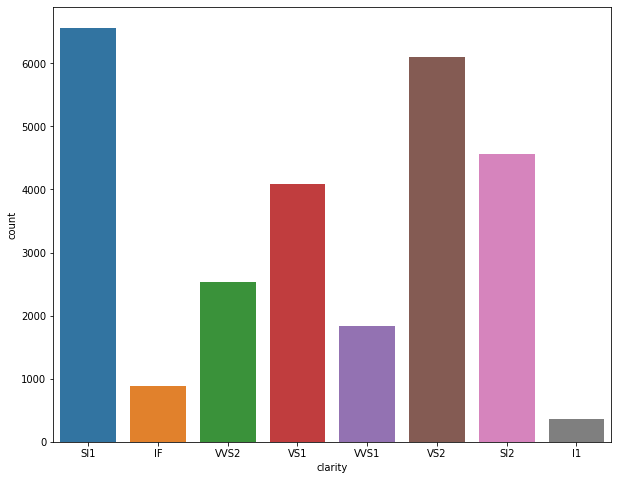

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(Gem['clarity']);

###From the visualization of categorical variable 'clarity' I can see that clarity of the cubic zirconia is in 8 types and among them the concentration of Sl1 is the highest and the concentration of l1 is the lowest.

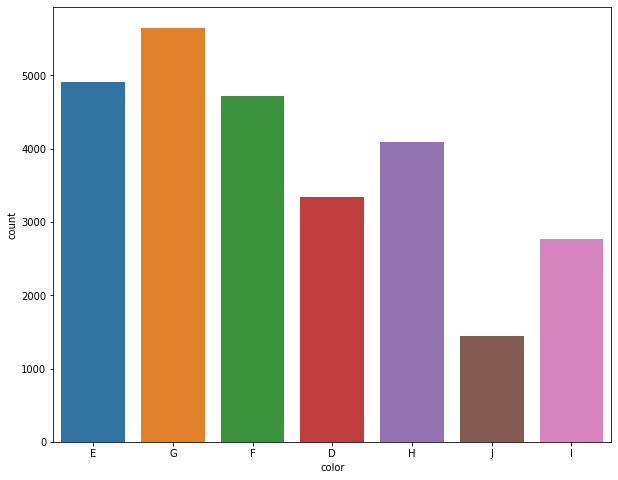

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(Gem['color']);

###From the visualization of categorical variable 'color' I can see that color  of the cubic zirconia is in 7 types and among them the concentration of G is the highest and the concentration of J is the lowest.

###Bivariate Analysis

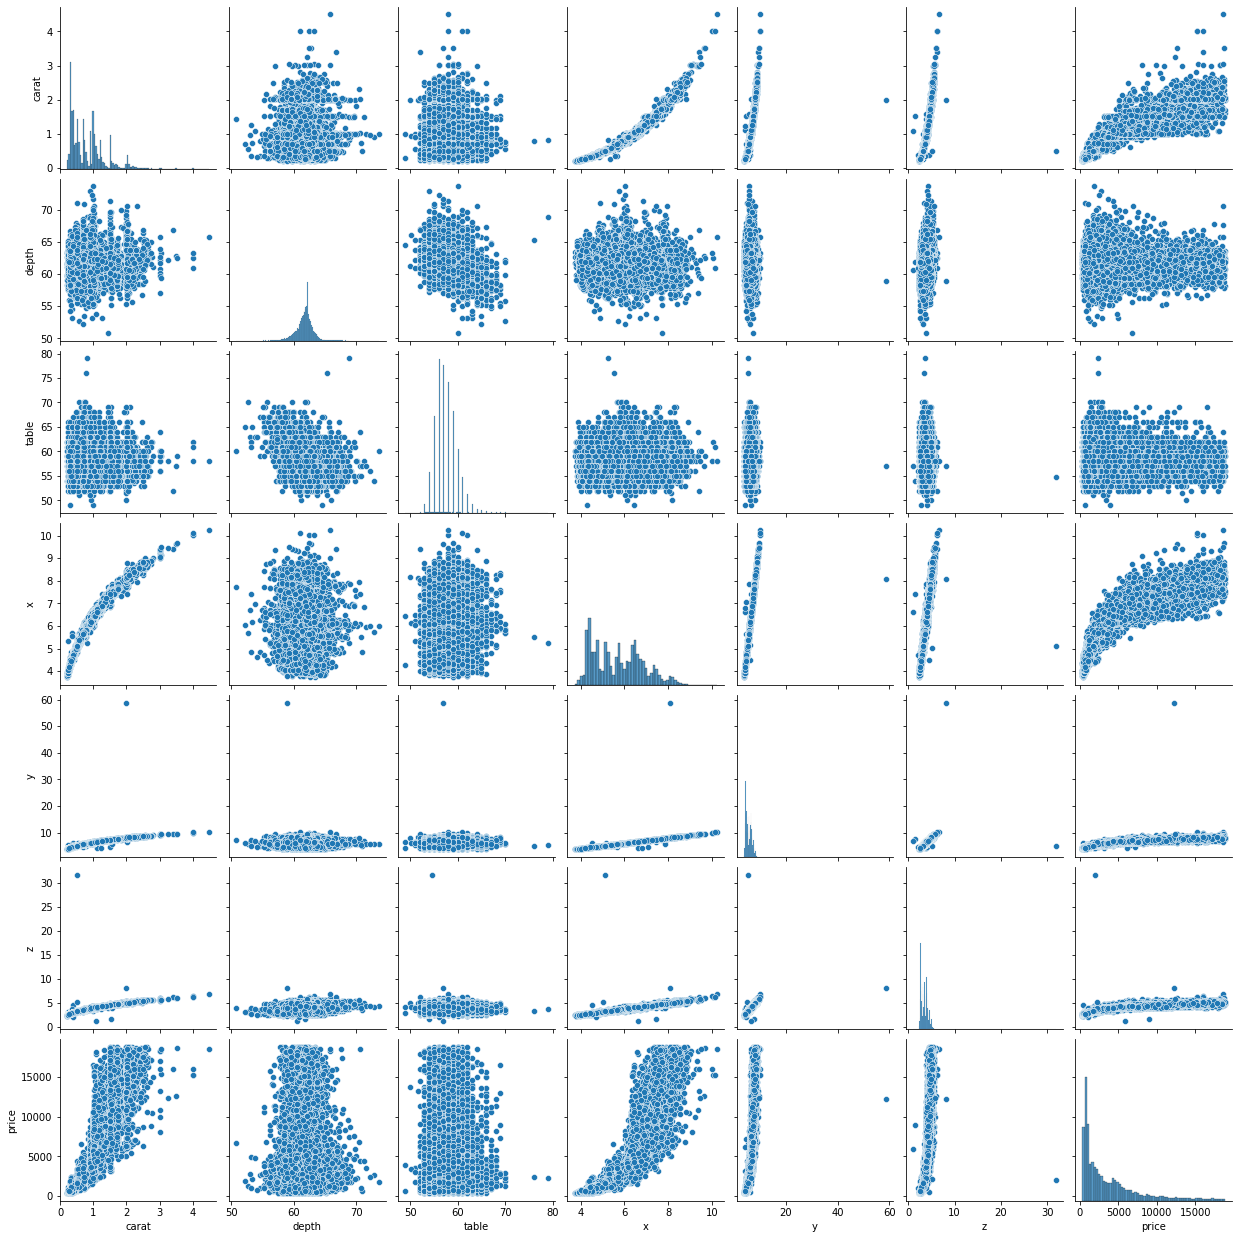

In [ ]:
sns.pairplot(Gem)
plt.show()

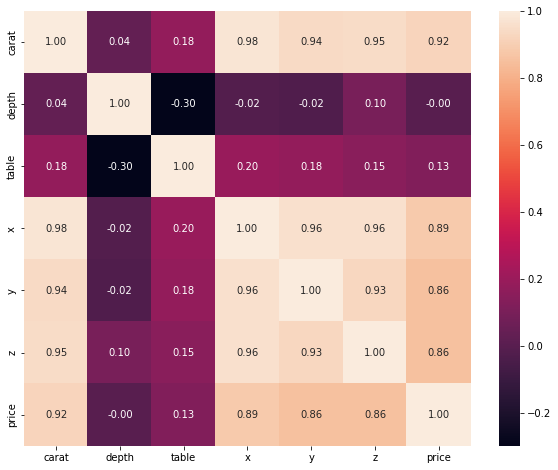

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(Gem.corr(),annot=True,fmt=".2f");

###From the above visualizations using pair plot and heatmap also I can clearly see that there is correlation present between carat and x, carat and y, carat and z, carat and price, x and y, x and z, y and z

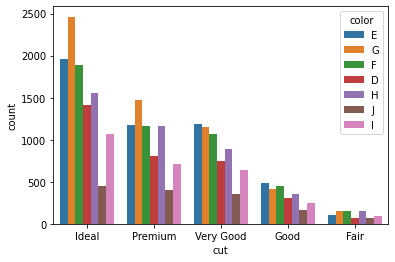

In [ ]:
sns.countplot(x='cut', hue='color', data=Gem)
plt.show()

###From the above visualization I can see the concentrations of cut quality on the basis of colors. The Ideal cut quality with G color has the highest concentration of Cubic Zirconia whereas the Fair cut quality with D color has the lowest concentration.

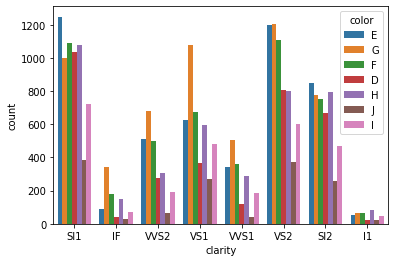

In [ ]:
sns.countplot(x='clarity', hue='color', data=Gem)
plt.show()

###From the above visualization I can see the concentrations of clarity on the basis of colors. The Sl1 clarity with E color has the highest concentration of Cubic Zirconia whereas the l1 with D color has the lowest concentration.

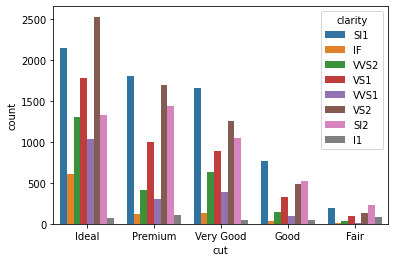

In [ ]:
sns.countplot(x='cut', hue='clarity', data=Gem)
plt.show()

###From the above visualization I can see the concentrations of cut quality on the basis of clarity. The Ideal cut quality with VS2 Clarity has the highest concentration of Cubic Zirconia whereas the Fair cut quality with WS1 clarity has the lowest concentration.

##Ans 1.2

In [ ]:
#Replacing the null values with median value
Gem['depth']=Gem['depth'].fillna(Gem['depth'].median())
Gem['x']=Gem['x'].fillna(Gem['x'].median())
Gem['y']=Gem['y'].fillna(Gem['y'].median())
Gem['z']=Gem['z'].fillna(Gem['z'].median())

In [ ]:
Gem.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

###I will encode the categorical variables cut, color and clarity in the ascending order from worst to best since linear regression does not take string variables as parameters into model building. Below is the encoding for ordinal values:

cut: Fair = 1, Good = 2, Very Good = 3, Premium = 4 and Ideal = 5

color: D = 1, E = 2, F = 3, G = 4, H = 5, I = 6 and J = 7

clarity: IF = 1, VVS1 = 2, VVS2 = 3, VS1 = 4, VS2 = 5, SI1 = 6, SI2 = 7 and I1 = 8

In [ ]:
Gem['cut'].replace(to_replace='Fair', value=1, inplace=True)
Gem['cut'].replace(to_replace='Good', value=2, inplace=True)
Gem['cut'].replace(to_replace='Very Good', value=3, inplace=True)
Gem['cut'].replace(to_replace='Premium', value=4, inplace=True)
Gem['cut'].replace(to_replace='Ideal', value=5, inplace=True)

In [ ]:
Gem['color'].replace(to_replace='D', value=1, inplace=True)
Gem['color'].replace(to_replace='E', value=2, inplace=True)
Gem['color'].replace(to_replace='F', value=3, inplace=True)
Gem['color'].replace(to_replace='G', value=4, inplace=True)
Gem['color'].replace(to_replace='H', value=5, inplace=True)
Gem['color'].replace(to_replace='I', value=6, inplace=True)
Gem['color'].replace(to_replace='J', value=7, inplace=True)

In [ ]:
Gem['color'].replace(to_replace='J', value=7, inplace=True)
Gem['clarity'].replace(to_replace='IF', value=1, inplace=True)
Gem['clarity'].replace(to_replace='VVS1', value=2, inplace=True)
Gem['clarity'].replace(to_replace='VVS2', value=3, inplace=True)
Gem['clarity'].replace(to_replace='VS1', value=4, inplace=True)
Gem['clarity'].replace(to_replace='VS2', value=5, inplace=True)
Gem['clarity'].replace(to_replace='SI1', value=6, inplace=True)
Gem['clarity'].replace(to_replace='SI2', value=7, inplace=True)
Gem['clarity'].replace(to_replace='I1', value=8, inplace=True)

In [ ]:
Gem.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,6,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,3,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,2,60.4,59.0,4.35,4.43,2.65,779


##Ans 1.3

###Train Test Split

In [ ]:
# Copy all the predictor variables into X dataframe
X = Gem.drop('price', axis=1)

# Copy target into the y dataframe. 
y = Gem[['price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

###Linear Regression Model

###Model 1

In [ ]:
Model1 = LinearRegression()
Model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
Model1.coef_

array([[ 1.11319717e+04,  1.07289876e+02, -3.34096299e+02,
        -5.04502769e+02, -8.20351503e+01, -3.00817917e+01,
        -9.84326705e+02,  1.00110404e+01, -4.53052426e+01]])

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Model1.coef_[0][idx]))

The coefficient for carat is 11131.971721301827
The coefficient for cut is 107.2898764434641
The coefficient for color is -334.0962986247492
The coefficient for clarity is -504.50276919718
The coefficient for depth is -82.03515027559254
The coefficient for table is -30.081791696879463
The coefficient for x is -984.3267054058508
The coefficient for y is 10.011040432152356
The coefficient for z is -45.3052426096894


In [ ]:
# Let us check the intercept for the model

intercept = Model1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 10873.757916675728


In [ ]:
# R square on training data
Model1.score(X_train, y_train)

0.9087174183809241

###90% of the variation in the price is explained by the predictors in the model for train set

In [ ]:
# R square on testing data
Model1.score(X_test, y_test)

0.9080038175630045

In [ ]:
#RMSE on Training data
predicted_train=Model1.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1211.3777081621436

In [ ]:
#RMSE on Testing data
predicted_test=Model1.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1229.213581123243

In [ ]:
ytrain_predict = Model1.predict(X_train)
ytest_predict = Model1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
round(mean_squared_error(y_test, ytest_predict),2)

1510966.03

In [ ]:
r2_score(y_test, ytest_predict)

0.9080038175630045

In [ ]:
print('The co-efficients:', Model1.coef_)
print('The intercept:', Model1.intercept_)
print('Mean Squared Error (MSE):', round(mean_squared_error(y_test, ytest_predict),2))
print('Root Mean Squared Error (RMSE):',np.sqrt(metrics.mean_squared_error(y_test,predicted_test)))
print('Co-efficient of Determination (r-square) on the train data:', r2_score(y_train, ytrain_predict))
print('Co-efficient of Determination (r-square) on the test data:', r2_score(y_test, ytest_predict))

The co-efficients: [[ 1.11319717e+04  1.07289876e+02 -3.34096299e+02 -5.04502769e+02
  -8.20351503e+01 -3.00817917e+01 -9.84326705e+02  1.00110404e+01
  -4.53052426e+01]]
The intercept: [10873.75791668]
Mean Squared Error (MSE): 1510966.03
Root Mean Squared Error (RMSE): 1229.213581123243
Co-efficient of Determination (r-square) on the train data: 0.9087174183809241
Co-efficient of Determination (r-square) on the test data: 0.9080038175630045


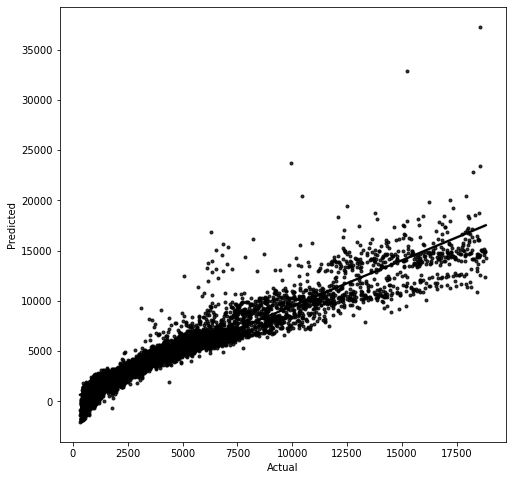

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(y_test['price'], ytest_predict, color='black', marker='.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

###Multiple Linear Regression using statsmodels(OLS)

###Model 2

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
formula = 'price ~ carat+color+clarity+depth+table+x+y+z'

In [ ]:
Model2 = smf.ols(formula=formula, data=Gem).fit()

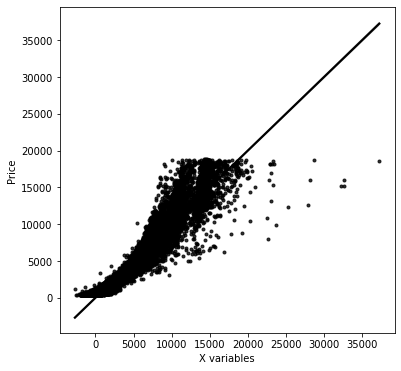

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x=Model2.fittedvalues, y=y, color='black', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

In [ ]:
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 3.315e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:55:18   Log-Likelihood:            -2.2965e+05
No. Observations:               26933   AIC:                         4.593e+05
Df Residuals:                   26924   BIC:                         4.594e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.518e+04    522.010     29.073      0.000    1.42e+04    1.62e+04
carat       1.104e+04     77.914    141.732      0.000    1.09e+04    1.12e+04
color       -327.8950      4.619    -70.988      0.000    -336.948    -318.841
clarity     -504.7947      4.998   -100.994      0.000    -514.592    -494.998
depth       -117.9162      6.313    -18.680      0.000    -130.289    -105.543
table        -61.3734      3.591    -17.090      0.000     -68.412     -54.334
x           -949.1372     45.808    -20.720      0.000   -1038.924    -859.351
y             21.7713     23.803      0.915      0.360     -24.883      68.426
z            -71.0283     41.393     -1.716      0.086    -152.160      10.103
==============================================================================
Omnibus:                     6018.922   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           285451.065
Skew:                          -0.135   Prob(JB):                         0.00
Kurtosis:                      18.947   Cond. No.                     5.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Model 3

In [ ]:
formula = 'price ~ carat+color+clarity+depth+table+x'

In [ ]:
Model3 = smf.ols(formula=formula, data=Gem).fit()
print(Model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 4.419e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:57:16   Log-Likelihood:            -2.2965e+05
No. Observations:               26933   AIC:                         4.593e+05
Df Residuals:                   26926   BIC:                         4.594e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.544e+04    501.408     30.792      0.0

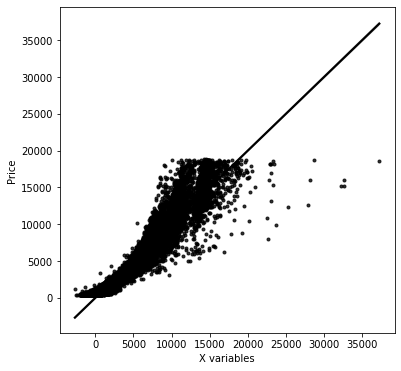

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x=Model3.fittedvalues, y=y, color='black', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

###Model4

In [ ]:
formula = 'price ~ carat+x'

In [ ]:
Model4 = smf.ols(formula=formula, data=Gem).fit()
print(Model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 7.985e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:58:28   Log-Likelihood:            -2.3568e+05
No. Observations:               26933   AIC:                         4.714e+05
Df Residuals:                   26930   BIC:                         4.714e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2365.9981    154.799     15.284      0.0

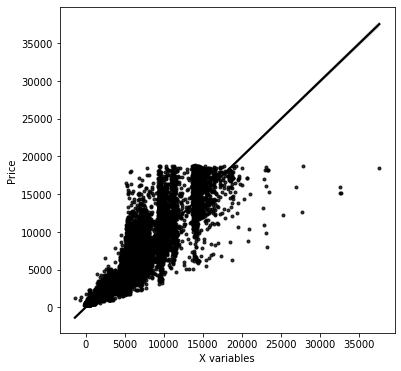

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x=Model4.fittedvalues, y=y, color='black', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

###Model 5

In [ ]:
formula = 'price ~ carat+color+clarity+depth+table'

In [ ]:
Model5 = smf.ols(formula=formula, data=Gem).fit()
print(Model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 5.123e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:59:48   Log-Likelihood:            -2.3007e+05
No. Observations:               26933   AIC:                         4.602e+05
Df Residuals:                   26927   BIC:                         4.602e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9132.1986    459.958     19.854      0.0

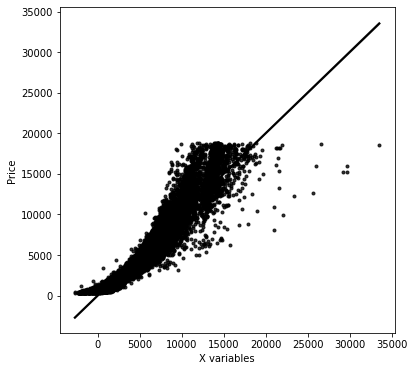

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x=Model5.fittedvalues, y=y, color='black', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

###Model6

In [ ]:
formula = 'price ~ carat+x+y+z'

In [ ]:
Model6 = smf.ols(formula=formula, data=Gem).fit()
print(Model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 4.009e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:01:24   Log-Likelihood:            -2.3563e+05
No. Observations:               26933   AIC:                         4.713e+05
Df Residuals:                   26928   BIC:                         4.713e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2532.9020    155.709     16.267      0.0

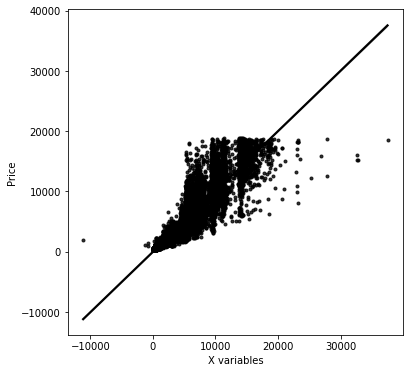

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x=Model6.fittedvalues, y=y, color='black', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

###Model 7

In [ ]:
formula = 'price ~ carat+cut+color+clarity+depth+table'

In [ ]:
Model7 = smf.ols(formula=formula, data=Gem).fit()
print(Model7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 4.306e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:02:44   Log-Likelihood:            -2.2996e+05
No. Observations:               26933   AIC:                         4.599e+05
Df Residuals:                   26926   BIC:                         4.600e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4612.4615    553.542      8.333      0.0

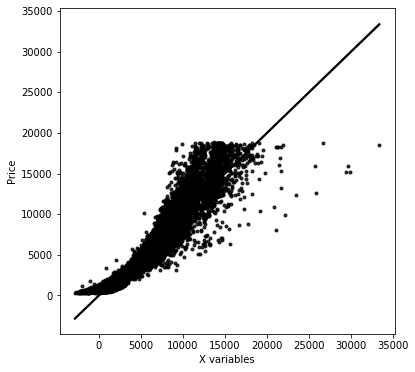

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x=Model7.fittedvalues, y=y, color='black', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

###Model 8

In [ ]:
formula = 'price ~ carat+cut+clarity+depth'

In [ ]:
Model8 = smf.ols(formula=formula, data=Gem).fit()
print(Model8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 5.371e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:06:09   Log-Likelihood:            -2.3219e+05
No. Observations:               26933   AIC:                         4.644e+05
Df Residuals:                   26928   BIC:                         4.644e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1791.9582    378.855      4.730      0.0

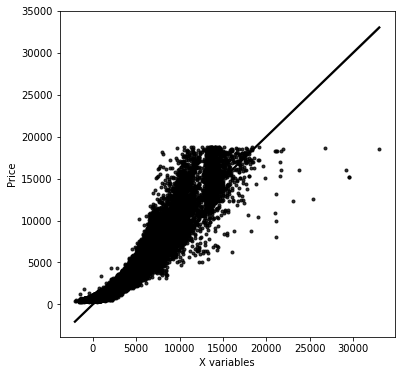

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x=Model8.fittedvalues, y=y, color='black', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

###Model 9

In [ ]:
formula = 'price ~ carat+cut+color+clarity+depth+table+x+y+z'

In [ ]:
Model9 = smf.ols(formula=formula, data=Gem).fit()
print(Model9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.971e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:06:29   Log-Likelihood:            -2.2954e+05
No. Observations:               26933   AIC:                         4.591e+05
Df Residuals:                   26923   BIC:                         4.592e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.078e+04    603.669     17.852      0.0

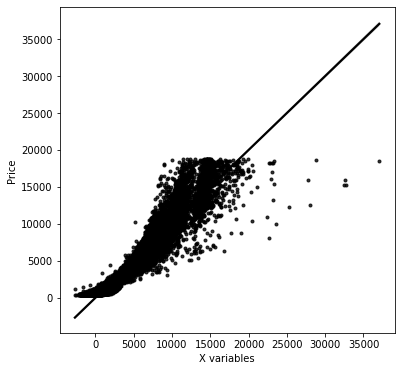

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x=Model9.fittedvalues, y=y, color='black', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

###Outlier Treatment

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lr = Q1-(1.5 * IQR)
    ur = Q3+(1.5 * IQR)
    return lr,ur

In [ ]:
for column in Gem.columns:
    lr,ur=remove_outlier(Gem[column])
    Gem[column]=np.where(Gem[column]>ur,ur,Gem[column])
    Gem[column]=np.where(Gem[column]<lr,lr,Gem[column])

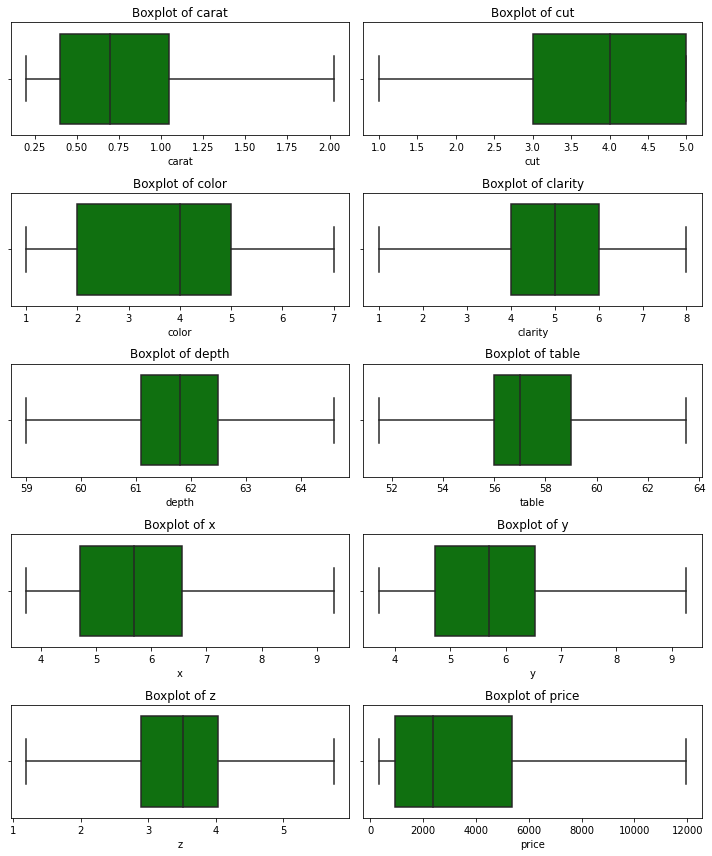

In [ ]:
plt.figure(figsize = (10,12))
feature_list = Gem.columns
for i in range(len(feature_list)):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=Gem[feature_list[i]], data=Gem, orient='h', color='g')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

###Linear Regression post Outlier Treatment

In [ ]:
x = Gem.drop('price', axis=1)
y = Gem[['price']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

###Model 10

In [ ]:
Model10 = LinearRegression()
Model10.fit(x_train, y_train)

LinearRegression()

In [ ]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, Model10.coef_[0][idx]))

The coefficient for carat is 8786.023234260396
The coefficient for cut is 102.17867687656138
The coefficient for color is -274.7728076998218
The coefficient for clarity is -433.17326145937096
The coefficient for depth is 36.49995014552427
The coefficient for table is -12.638819973721027
The coefficient for x is -1201.232972022713
The coefficient for y is 1503.309087296295
The coefficient for z is -1064.9263850204543


In [ ]:
print(Model10.intercept_)

[-0.00471239]


In [ ]:
Model10.score(x_train, y_train)

0.9309474341319639

In [ ]:
Model10.score(x_test, y_test)

0.9321515744355586

In [ ]:
ytest_predict = Model10.predict(x_test)

In [ ]:
print(mean_squared_error(y_train, ytrain_predict))

26878555.32889055


In [ ]:
print(np.sqrt(mean_squared_error(y_train, ytrain_predict)))

5184.4532333593825


In [ ]:
print(mean_squared_error(y_test, ytest_predict))

821795.9644968482


In [ ]:
print(np.sqrt(mean_squared_error(y_test, ytest_predict)))

906.529626927244


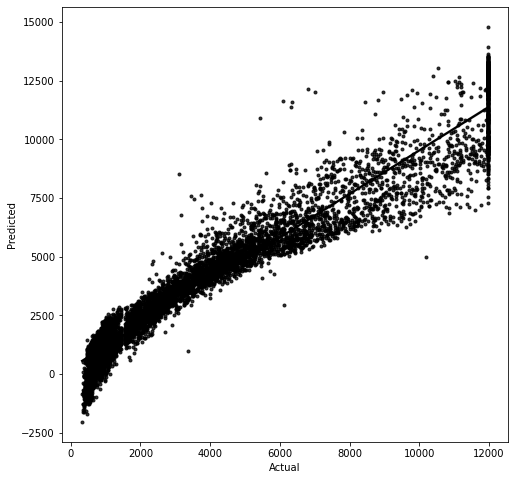

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(y_test['price'], ytest_predict, color='black', marker='.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

###Model 11

In [ ]:
formula = 'price ~ carat+cut+color+clarity+depth+table+x+y+z'

In [ ]:
Model11 = smf.ols(formula=formula, data=Gem).fit()
print(Model11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 4.057e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:14:41   Log-Likelihood:            -2.2169e+05
No. Observations:               26933   AIC:                         4.434e+05
Df Residuals:                   26923   BIC:                         4.435e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    304.7344    665.493      0.458      0.6

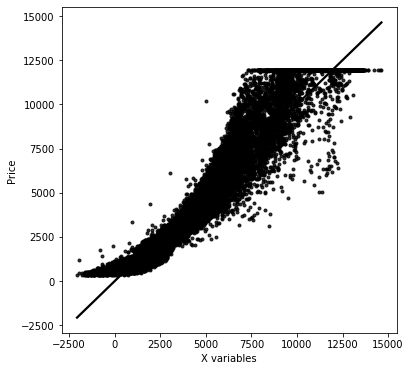

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x=Model11.fittedvalues, y=y, color='black', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

###Checking Multicollinearity using Variance Inflation Factor (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])]

In [ ]:
i=0
for column in x.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 121.25246159295669
cut ---> 17.180662501634693
color ---> 6.122143497429826
clarity ---> 12.40897583452349
depth ---> 1173.6272034792662
table ---> 849.742859055402
x ---> 10634.887983556753
y ---> 9379.613003127597
z ---> 3062.473615666626


###Variance Inflation Factor (VIF) is one of the methods to check if independent variables have correlation between them. If they are correlated, then it is not ideal for linear regression models as they inflate the standard errors which in turn affects the regression parameters. As a result, the regression model becomes non-reliable and lacks interpretability.

###General rule of thumb: If VIF values are equal to 1, then that means there is no multicollinearity. If VIF values are equal to 5 or exceedingly more than 5, then there is moderate multicollinearity. If VIF is 10 or more, then that means there is high collinearity.

###From the above I can conclude that variables carat, cut, depth, table, x, y and z have high multicollinearity whereas variable color and clarity has moderate correlation. However variables cut, color and clarity are categorical variables which are transformed to numerical using encoding. Hence it is difficult to say whether the VIF values indicate the right results.

In [ ]:
for i,j in np.array(Model11.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(304.73) * Intercept + (8812.13) * carat + (109.11) * cut + (-274.24) * color + (-435.77) * clarity + (31.6) * depth + (-12.72) * table + (-1224.07) * x + (1436.03) * y + (-927.17) * z + 

##Ans 1.4

###**Model Comparison**  
###From the above combination of different dependent variables, I have the below R-squared values for each combination. Based on the R-squared values, I will go with the stats_model with formula price = carat+cut+color+clarity+depth+table+x+y+z for price prediction as 91.00% of the price is explained by the dependent variables.


###Business Insights and Recommendations

* Model11 and Model10 has performed better after treating outliers.

* The highest R-squared is 93.00% which I have achieved by using stats_model post outlier treatment.

* I can see that there is high multicollinearity in the dataset.

* Intercept of the model is 304.73.

* R-squared 93.00% shows a good accuracy which means 93% of the price is explained by the model.

* RMSE on training data is 5184.45 and RMSE on testing data is 906.53.

* As per the above graph there is a strong linear relationship between the actual and predicted values with some noise to an extent which signifies the unexplained variance.

* As per our model carat, cut, color, clarity, depth, table, x, y and z are the best attributes to influence price. 

* Increase in carat weight of the diamond will increase the price of the diamond considerably.

* Width (y) of the diamond in mm also plays an important factor. As the width increases the price also increases.

* Brighter the color of the diamond, the price increases.

* Gem Stones Ltd should work on carat, color and width of the diamonds which are strong contributors for price.

* Gem Stones Ltd can collect more data in future which helps in building more robust models for price prediction. For now model11 and model10 are good for price prediction. If Gem Stones Ltd wants to use the model without outlier treatment, they can use any of the models Model 1, Model 2 and Model 3 which predict the price 91.00% accurately.

#Ans 2

##Ans 2.1

In [ ]:
Path1=('/content/drive/MyDrive/Holiday_Package.csv')
Holiday= pd.read_csv(Path1)

In [ ]:
Holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [ ]:
Holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [ ]:
Holiday.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
Holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [ ]:
Holiday.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [ ]:
Holiday.shape

(872, 7)

In [ ]:
dups = Holiday.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Holiday[dups]

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [ ]:
Holiday.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [ ]:
Holiday['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [ ]:
Holiday['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

###Univariate Analysis

###Numerical Variables

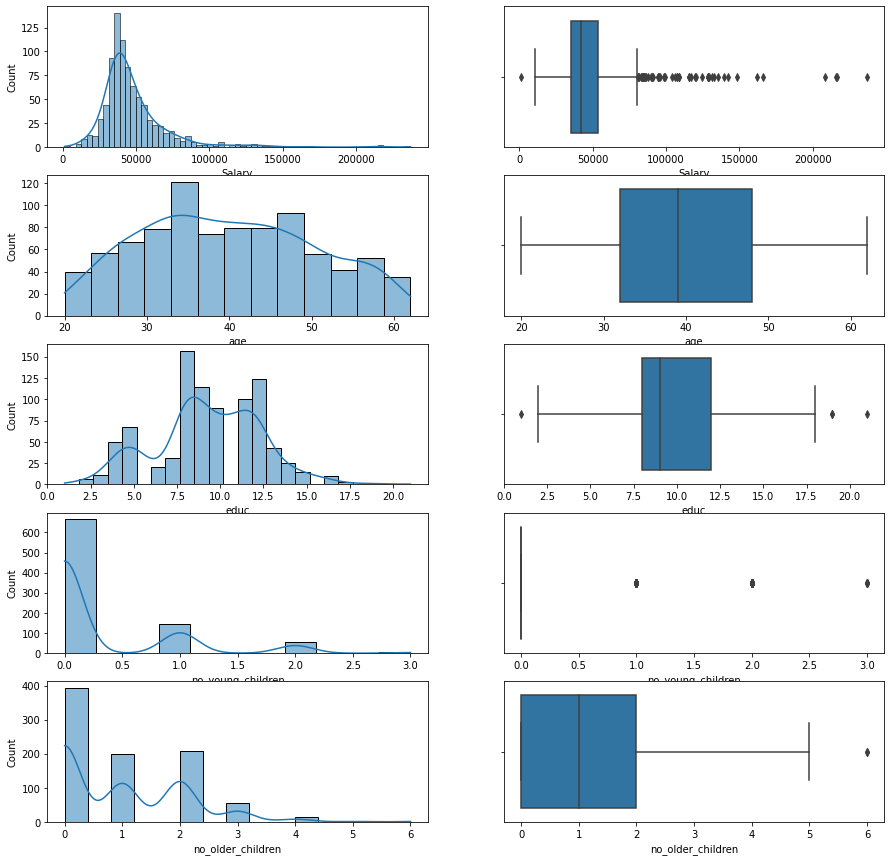

In [ ]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15,15)
sns.histplot(Holiday['Salary'], kde=True, ax=axes[0][0])
sns.boxplot(x='Salary', data=Holiday, ax=axes[0][1])
sns.histplot(Holiday['age'] , kde=True, ax=axes[1][0])
sns.boxplot(x='age', data=Holiday , ax=axes[1][1])
sns.histplot(Holiday['educ'] , kde=True, ax=axes[2][0])
sns.boxplot(x='educ', data=Holiday , ax=axes[2][1])
sns.histplot(Holiday['no_young_children'], kde=True, ax=axes[3][0])
sns.boxplot(x='no_young_children', data=Holiday, ax=axes[3][1])
sns.histplot(Holiday['no_older_children'], kde=True, ax=axes[4][0])
sns.boxplot(x='no_older_children', data=Holiday, ax=axes[4][1])
plt.show()

###From the above analysis I can that for

*   Salary - Data is positively skewed and the mean is greater than the median here. The mean for Salary is 47729.17 and the median is 41903.50. The minimum employee salary is 1322 and the maximum employee salary is 236961. Many outliers are detected.
*   age	- Here mean is almost equal to the median so I can say it is normally distributed. The mean is 39.95 and the median is 39. The minimum age of employee is 20 and the maximum age of employee is 62. No Outlier is detected.
*   educ - Here mean is almost equal to the median so I can say it is normally distributed. The mean is 9.30 and the median is 9. The minimum years of formal education is 1 and the maximum years of formal education is 21. 3 outliers are detected.
*   no_young_children- Data is positively skewed and the mean is little higher than the median. The mean for x is 0.312 and the median is 0. The ranges of number of young children lies between 0 to 3. 3 outliers are detected.
*   no_old_children- Data is normally distributed.The median is very slightly greater than the mean. The mean is 0.98 and the median is 1. The ranges of number of young children lies between 0 to 3. One outlier is detected.

###Categorical Variables

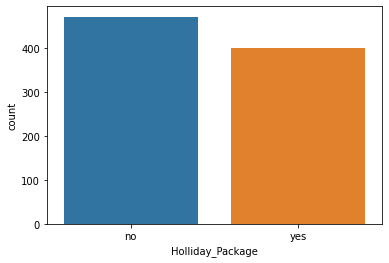

In [ ]:
sns.countplot(x='Holliday_Package', data=Holiday)
plt.show()

###From the above analyis I can see that 471 employees did not opt for Holiday Packages and 401 employees have opted for it.

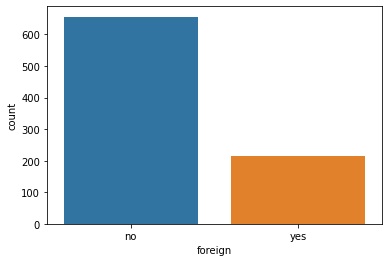

In [ ]:
sns.countplot(x='foreign', data=Holiday)
plt.show()

###From the above analysis I can see that 656 employees are not foreigners whereas around 216 employees are foreigners.

###Bivariate Analysis

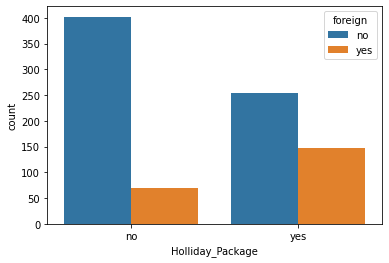

In [ ]:
sns.countplot(x='Holliday_Package', hue='foreign', data=Holiday)
plt.show()

###From this analysis I can see that employees who did not opt for holiday package, among them around 50 employees are foreigners. In the same way employees who opted for holiday package among them 150 employees are foreigners.

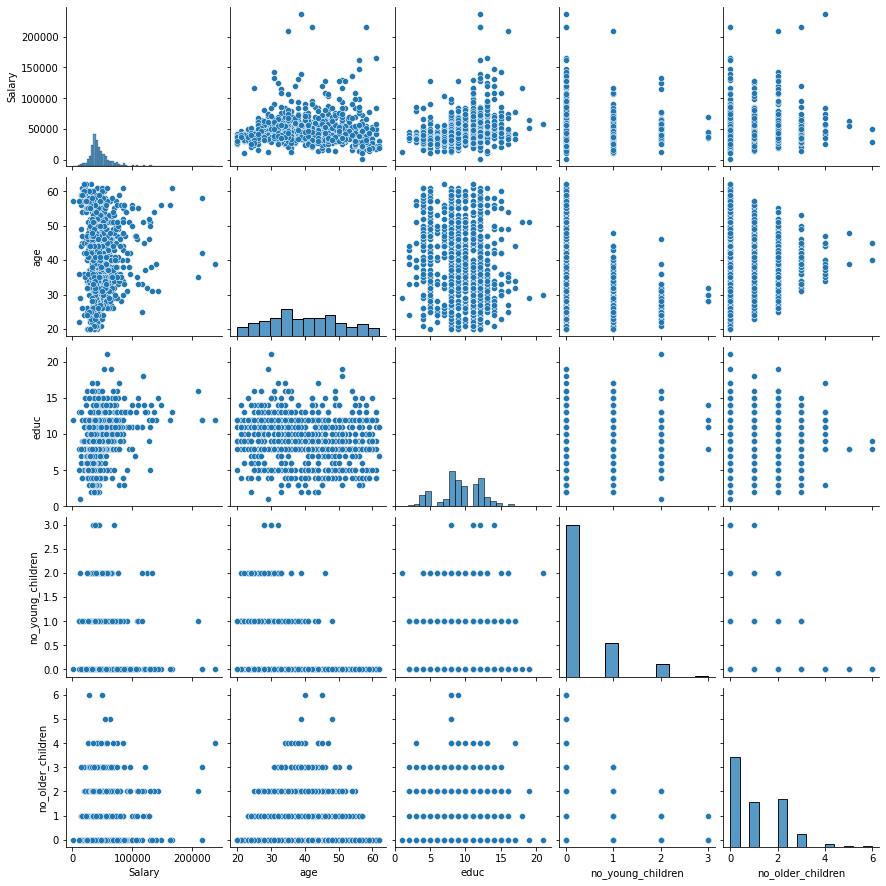

In [ ]:
sns.pairplot(Holiday)
plt.show()

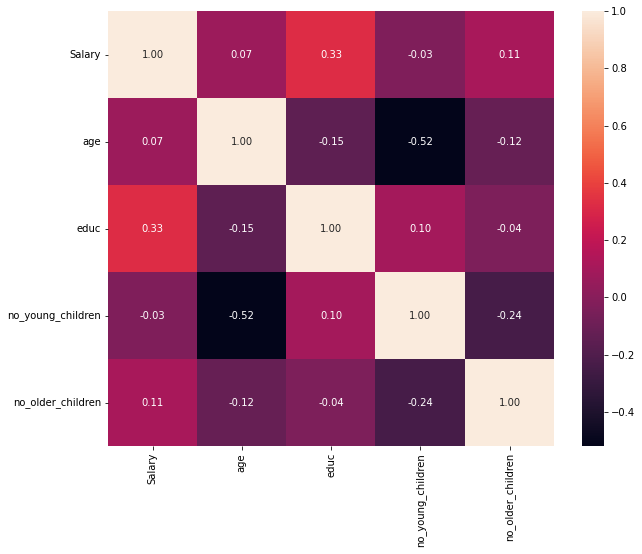

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(Holiday.corr(),annot=True,fmt=".2f");

###From the pairplot and heatmap analysis I can see that there is hardly any correlation among the variables present.

##Ans 2.2

In [ ]:
for feature in Holiday.columns: 
    if Holiday[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(Holiday[feature].unique()))
        print(pd.Categorical(Holiday[feature].unique()).codes)
        Holiday[feature] = pd.Categorical(Holiday[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [ ]:
Holiday.head(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0
5,1,61590,42,12,0,1,0
6,0,94344,51,8,0,0,0
7,1,35987,32,8,0,2,0
8,0,41140,39,12,0,0,0
9,0,35826,43,11,0,2,0


In [ ]:
Holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


###Train Test Split

In [ ]:
x = Holiday.drop('Holliday_Package',axis=1)
y = Holiday[['Holliday_Package']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [ ]:
y_train.value_counts()

Holliday_Package
0                   326
1                   284
dtype: int64

In [ ]:
y_test.value_counts()

Holliday_Package
0                   145
1                   117
dtype: int64

###Logistic Regression Model

In [ ]:
Model = LogisticRegression()
Model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Predicting on Training and Test dataset
ytrain_predict = Model.predict(X_train)
ytest_predict = Model.predict(X_test)

In [ ]:
#Getting the Predicted Classes and Probs
ytest_predict_prob=Model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.628400,0.371600
1,0.517955,0.482045
2,0.559374,0.440626
3,0.728628,0.271372
4,0.504930,0.495070


In [ ]:
# Getting the probabilities on the train set
ytrain_predict_prob=Model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.498058,0.501942
1,0.542799,0.457201
2,0.745783,0.254217
3,0.594279,0.405721
4,0.491644,0.508356


In [ ]:
#Model Evaluation
# Accuracy - Training Data
Model.score(X_train, y_train)

0.519672131147541

###Applying GridSearchCV for Logistic Regression

In [ ]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [ ]:
Model_2 = LogisticRegression(max_iter=10000,n_jobs=2)

In [ ]:
grid_search = GridSearchCV(estimator = Model_2, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2)


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
# Prediction on the training set

ytrain_predict1 = best_model.predict(X_train)
ytrain_predict1 = best_model.predict(X_test)

In [ ]:
# Getting the probabilities on the test set

ytest_predict_prob1=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.628400,0.371600
1,0.517955,0.482045
2,0.559374,0.440626
3,0.728628,0.271372
4,0.504930,0.495070


In [ ]:
# Getting the probabilities on the train set
ytrain_predict_prob1=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob1).head()

,0,1
0,0.498058,0.501942
1,0.542799,0.457201
2,0.745783,0.254217
3,0.594279,0.405721
4,0.491644,0.508356


In [ ]:
# Accuracy - Training Data
best_model.score(X_train, y_train)

0.519672131147541

###Linear Discriminant Analysis(LDA) algorithm

In [ ]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
Lda_model=clf.fit(X_train,y_train)

In [ ]:
pred_class_train = Lda_model.predict(X_train)
pred_class_test = Lda_model.predict(X_test)

In [ ]:
#Probability prediction for the training and test data
# Training Data Probability Prediction
pred_prob_train = Lda_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = Lda_model.predict_proba(X_test)

In [ ]:
# Accuracy - Training Data
Lda_model.score(X_train, y_train)

0.6721311475409836

##Ans 2.3

###Logistic regression

AUC for the Training Data: 0.567
AUC for the Test Data: 0.627


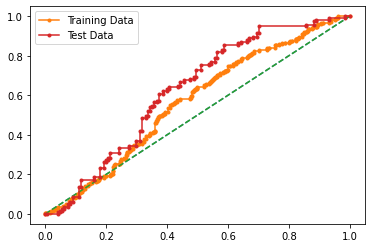

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lr = metrics.roc_auc_score(y_train,ytrain_predict_prob[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lr = metrics.roc_auc_score(y_test,ytest_predict_prob[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lr )

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
confusion_matrix(y_train, ytrain_predict)

array([[294,  32],
       [261,  23]])

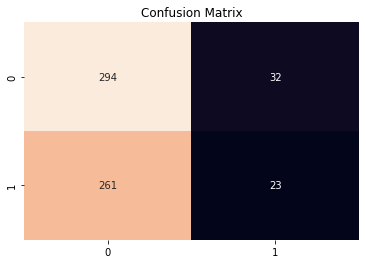

In [ ]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.53      0.90      0.67       326
           1       0.42      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.47      0.49      0.40       610
weighted avg       0.48      0.52      0.42       610



In [ ]:
confusion_matrix(y_test, ytest_predict)

array([[129,  16],
       [107,  10]])

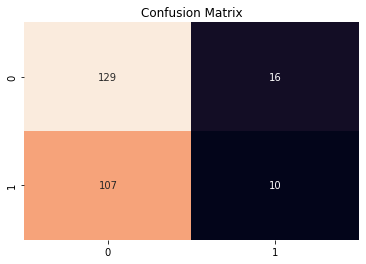

In [ ]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.38      0.09      0.14       117

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.41       262
weighted avg       0.47      0.53      0.44       262



###Linear Discriminant Analysis

AUC for the Training Data: 0.742
AUC for the Test Data: 0.703


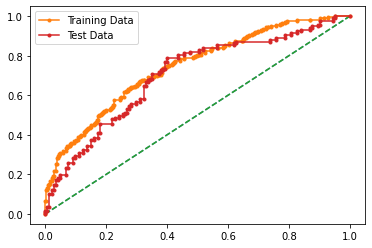

In [ ]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lda  = metrics.roc_auc_score(y_train, pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lda)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lda = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % test_auc_lda)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
confusion_matrix(y_test, pred_class_test)

array([[103,  42],
       [ 52,  65]])

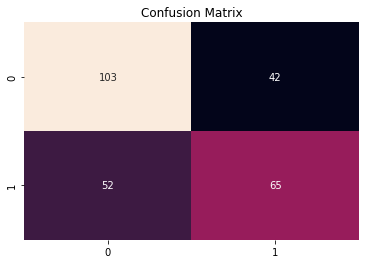

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred_class_test),annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [ ]:
confusion_matrix(y_train, pred_class_train)

array([[252,  74],
       [126, 158]])

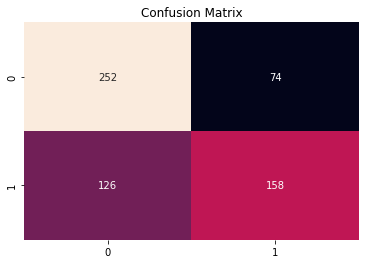

In [ ]:
sns.heatmap(confusion_matrix(y_train, pred_class_train),annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [ ]:
#Comparing both models
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[0.52,0.567,0.08,0.42,0.14],
        'LR Test':[0.53,0.627,0.09,0.38,0.14],
        'LDA Train':[0.67,0.742,0.56,0.68,0.61],
        'LDA Test':[0.64,0.703,0.56,0.61,0.58]},index=index)   

In [ ]:
data

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.520,0.530,0.670,0.640
AUC,0.567,0.627,0.742,0.703
Recall,0.080,0.090,0.560,0.560
Precision,0.420,0.380,0.680,0.610
F1 Score,0.140,0.140,0.610,0.580


###After comparing both models I can see that the model which uses Linear Discriminant Analysis algorithm is the best fit for this problem as the recall value and F1 scores are very poor for the model which uses Logistic Regression.

##Ans 2.4

###Insights and recommendations:

* Model_2 using Linear Discriminant Analysis has done better performance here.
* 74.2% accuracy scores are obtained using this model.
* The model predicts whether an employee will opt for a holiday package or not  74.2% accurately most of the times.
* However the data shows that there is a class balance between yes and no classes.
* Model still needs to improve as 25.8% the model might predict incorrectly.
* More data needs to be collected in order to build better models.
* It seems like the tours and travel company is providing holiday packages with high prices without any discounts or offers which is why we see that most of the employees are not opting for the holiday package. They need to come up with different offers and schemes which are budget friendly so that more employees might opt for a holiday package.